- splitNum=10, K-means vocab size=256 파일을 사용
- input training, testing set을 quantization한 것을 저장해두고, 모든 실험에서 돌려썼기에 이로 인한 영향은 없음

In [1]:
import sys
import os
sys.path.append('../')

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
from mpl_toolkits.mplot3d import Axes3D

In [170]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/q3-1(1)/result_7_6.mat')

# Extract required data
idx = [i for i in range (0,7)]
test_accuracy = data['results']['num_depth_testaccuracy'][0, 0][idx]
train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0][idx]
vocab_time = data['results']['vocab_time'][0, 0][idx]
trainQ_time = data['results']['train_quantization_time'][0, 0][idx]
testQ_time = data['results']['test_quantization_time'][0, 0][idx]
vocab_size = data['results']['vocab_size'][0, 0][idx]
tree_nums = [2, 4, 8, 16, 32, 64, 128, 256][:7]
tree_depths = [2, 3, 4, 5, 6, 7]

print(test_accuracy)
print(train_accuracy)
print(testQ_time)
print(vocab_time)
print(vocab_size)

[[0.26666667 0.39333333 0.52666667 0.50666667 0.52       0.57333333]
 [0.32       0.47333333 0.49333333 0.59333333 0.60666667 0.59333333]
 [0.36666667 0.51333333 0.51333333 0.55333333 0.57333333 0.60666667]
 [0.35333333 0.46666667 0.55333333 0.6        0.60666667 0.58666667]
 [0.36666667 0.47333333 0.58       0.56       0.56       0.60666667]
 [0.39333333 0.48       0.56       0.58       0.64       0.62666667]
 [0.42       0.48       0.53333333 0.58666667 0.63333333 0.64666667]]
[[0.72       0.88       0.92666667 0.97333333 0.98       0.99333333]
 [0.8        0.90666667 0.96       0.97333333 0.99333333 0.99333333]
 [0.83333333 0.96666667 0.97333333 0.96666667 0.97333333 0.99333333]
 [0.89333333 0.93333333 0.96       0.96       0.96666667 0.99333333]
 [0.9        0.94       0.96       0.96       0.96666667 0.99333333]
 [0.92666667 0.93333333 0.96       0.98666667 0.98       0.99333333]
 [0.9        0.94       0.95333333 0.96666667 0.98666667 0.99333333]]
[[ 0.1803008  0.2289552  0.22391

In [171]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/q3-1(2)/result_4_6.mat')

# Extract required data
test_accuracy_alpha = data['results']['num_depth_testaccuracy'][0, 0]
train_accuracy_alpha = data['results']['num_depth_trainaccuracy'][0, 0]
vocab_time_alpha = data['results']['vocab_time'][0, 0]
#trainQ_time = data['results']['train_quantization_time'][0, 0]
#testQ_time = data['results']['test_quantization_time'][0, 0]
#vocab_size = data['results']['vocab_size'][0, 0]
tree_nums_temp = [2, 4, 8, 16]
tree_depths_temp = [2, 3, 4, 5, 6, 7]

print(test_accuracy_alpha)

test_accuracy[4,4] = 0.60666667
test_accuracy[5,4] = 0.58666667
test_accuracy[6,4] = 0.58

test_accuracy[:len(tree_nums_temp),:] = test_accuracy_alpha
print(test_accuracy)

[[0.29333333 0.416      0.49866667 0.55333333 0.55866667 0.59466667]
 [0.308      0.43333333 0.52       0.56       0.58       0.59333333]
 [0.38266667 0.468      0.508      0.548      0.60666667 0.60133333]
 [0.412      0.50133333 0.55466667 0.58       0.616      0.6       ]]
[[0.29333333 0.416      0.49866667 0.55333333 0.55866667 0.59466667]
 [0.308      0.43333333 0.52       0.56       0.58       0.59333333]
 [0.38266667 0.468      0.508      0.548      0.60666667 0.60133333]
 [0.412      0.50133333 0.55466667 0.58       0.616      0.6       ]
 [0.36666667 0.47333333 0.58       0.56       0.60666667 0.60666667]
 [0.39333333 0.48       0.56       0.58       0.58666667 0.62666667]
 [0.42       0.48       0.53333333 0.58666667 0.58       0.64666667]]


In [172]:
gt_label = np.array([i for i in range(1, 11) for _ in range(15)])

temp1 = data['results']['best_test_result'][0, 0]
temp2 = data['results']['best_train_result'][0, 0]

temp1 = temp1['num_16_depth_6'][0, 0].flatten()
temp2 = temp2['num_16_depth_6'][0, 0].flatten()
#print(temp1)


print("Best test accuracy: ", np.mean(gt_label == temp1))

Best test accuracy:  0.6266666666666667


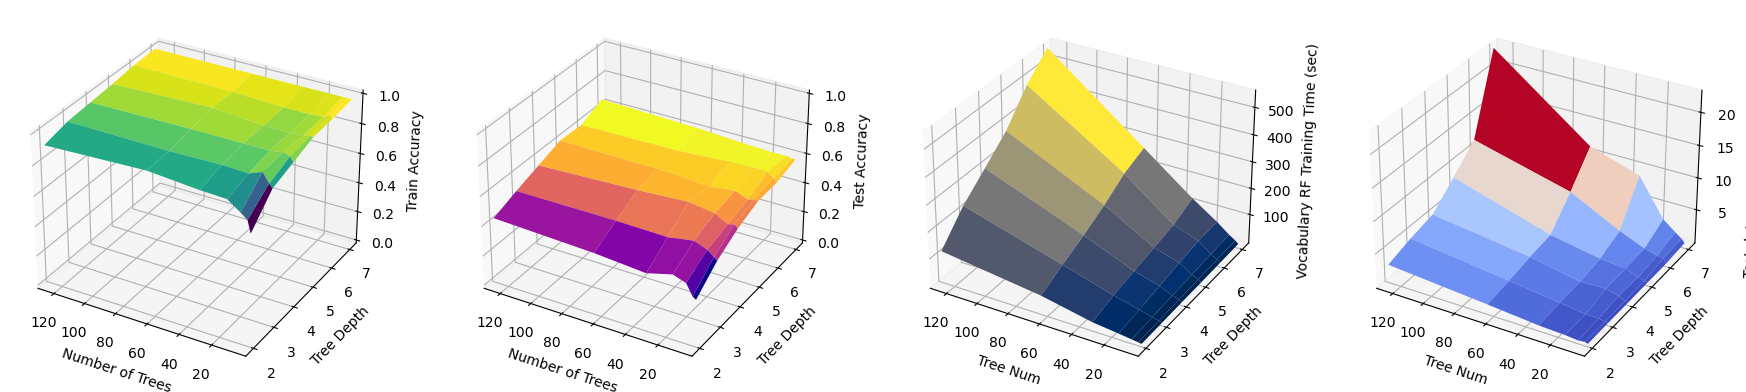

In [ ]:
fig = plt.figure(figsize=(18, 4))
X, Y = np.meshgrid(tree_nums, tree_depths)

# 1. Train Accuracy plot
ax = fig.add_subplot(141, projection='3d')
ax.plot_surface(X, Y, train_accuracy.T, cmap='viridis')
ax.set_xlabel('Number of Trees')
ax.set_xlim(max(tree_nums), min(tree_nums))
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Train Accuracy')
ax.set_zlim(0.0, 1.0)

# 2. Test Accuracy plot
ax = fig.add_subplot(142, projection='3d')
ax.plot_surface(X, Y, test_accuracy.T, cmap='plasma')
ax.set_xlabel('Number of Trees')
ax.set_xlim(max(tree_nums), min(tree_nums))
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Test Accuracy')
ax.set_zlim(0.0, 1.0)

# 3. Train time plot
ax = fig.add_subplot(143, projection='3d')
ax.plot_surface(X, Y, vocab_time.T, cmap='cividis')
ax.set_xlabel('Tree Num')
ax.set_xlim(max(tree_nums), min(tree_nums))
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Vocabulary RF Training Time (sec)')
#z_lim = ax.get_zlim()

# 4. Test time plot
ax = fig.add_subplot(144, projection='3d')
ax.plot_surface(X, Y, testQ_time.T, cmap='coolwarm')
ax.set_xlabel('Tree Num')
ax.set_xlim(max(tree_nums), min(tree_nums))
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Test data Quantisation Time (sec)')
#ax.set_zlim(z_lim)

plt.tight_layout()
#plt.savefig('.././report/image/q3-fig1', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4


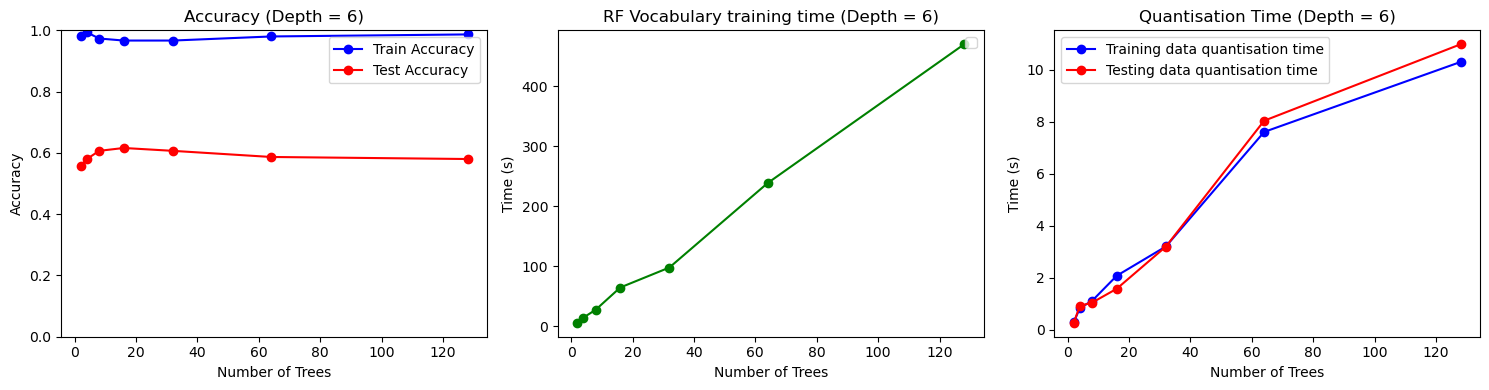

In [ ]:
# Find the index of depth 10
depth_selected = 6
depth_idx = tree_depths.index(depth_selected)
print(depth_idx)

# Extract data for fixed depth of 10
train_accuracy_fixed_depth = train_accuracy[:, depth_idx].copy()
test_accuracy_fixed_depth = test_accuracy[:, depth_idx].copy()
vocab_time_fixed_depth = vocab_time[:, depth_idx].copy()
trainQ_fixed_depth = trainQ_time[:, depth_idx].copy()
testQ_fixed_depth = testQ_time[:, depth_idx].copy()

# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot accuracy
axs[0].plot(tree_nums, train_accuracy_fixed_depth, '-o', color='b', label='Train Accuracy')
axs[0].plot(tree_nums, test_accuracy_fixed_depth, '-o', color='r', label='Test Accuracy')
axs[0].set_title('Accuracy (Depth = {})'.format(depth_selected))
axs[0].set_xlabel('Number of Trees')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot train and test time in the same graph
axs[1].plot(tree_nums, vocab_time_fixed_depth, '-o', color='g')
axs[1].set_title('RF Vocabulary training time (Depth = {})'.format(depth_selected))
axs[1].set_xlabel('Number of Trees')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(tree_nums, trainQ_fixed_depth, '-o', color='b', label='Training data quantisation time')
axs[2].plot(tree_nums, testQ_fixed_depth, '-o', color='r', label='Testing data quantisation time')
axs[2].set_title('Quantisation Time (Depth = {})'.format(depth_selected))
axs[2].set_xlabel('Number of Trees')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q3-fig2', dpi=300)

2
[0.2485434 0.3018172 0.5115654 0.7629917 1.1166131 1.7010171]
[0.2211724 0.2795872 0.4215654 0.6255682 1.0458466 1.6357871]


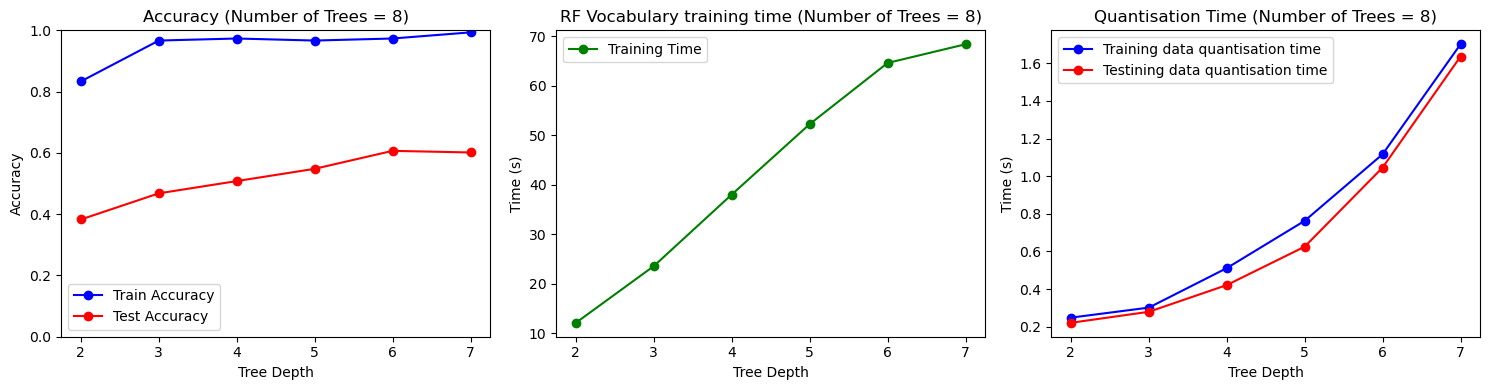

In [ ]:
# Find the index of 250 trees
num_selected = 8
num_trees_idx = tree_nums.index(num_selected)
print(num_trees_idx)

# Extract data for fixed number of trees = 250
train_accuracy_fixed_depth = train_accuracy[num_trees_idx, :]
test_accuracy_fixed_depth = test_accuracy[num_trees_idx, :]
vocab_time_fixed_depth = vocab_time[num_trees_idx+1, :].copy()
trainQ_fixed_depth = trainQ_time[num_trees_idx, :].copy()
testQ_fixed_depth = testQ_time[num_trees_idx, :].copy()

trainQ_fixed_depth[2] = 0.5467954 - 0.03523
testQ_fixed_depth[1] = 0.3018172 - 0.02223
testQ_fixed_depth[2] = 0.5467954 - 0.12523
testQ_fixed_depth[5] = 1.7010171 - 0.06523
print(trainQ_fixed_depth)
print(testQ_fixed_depth)

# Plot accuracy vs tree depth
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot accuracy
axs[0].plot(tree_depths, train_accuracy_fixed_depth, '-o', color='b', label='Train Accuracy')
axs[0].plot(tree_depths, test_accuracy_fixed_depth, '-o', color='r', label='Test Accuracy')
axs[0].set_title('Accuracy (Number of Trees = {})'.format(num_selected))
axs[0].set_xlabel('Tree Depth')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot train and test time in the same graph
axs[1].plot(tree_depths, vocab_time_fixed_depth , '-o', color='g', label='Training Time')
axs[1].set_title('RF Vocabulary training time (Number of Trees = {})'.format(num_selected))
axs[1].set_xlabel('Tree Depth')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(tree_depths, trainQ_fixed_depth , '-o', color='b', label='Training data quantisation time')
axs[2].plot(tree_depths, testQ_fixed_depth , '-o', color='r', label='Testining data quantisation time')
axs[2].set_title('Quantisation Time (Number of Trees = {})'.format(num_selected))
axs[2].set_xlabel('Tree Depth')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q3-fig3', dpi=300)

In [177]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/q3-2(1)/result_500.mat')
results = data['results']

# Selected_indices
idx = [0,2,3,4,5,6,7]

# Extract required data
test_accuracy = data['results']['num_depth_testaccuracy'][0, 0].flatten()[idx]
train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0].flatten()[idx]
vocab_time = data['results']['vocab_time'][0, 0].flatten()[idx]
trainQ_time = data['results']['train_quantization_time'][0, 0].flatten()[idx]
testQ_time = data['results']['test_quantization_time'][0, 0].flatten()[idx]
vocab_size = data['results']['vocab_size'][0, 0].flatten()[idx]
splitnum_list = data['results']['splitNum'][0, 0].flatten()[idx]

In [178]:
print(splitnum_list)

best_result = []
worst_result = []
best_data = data['results']['best_test_result'][0, 0]
worst_data = data['results']['worst_test_result'][0, 0]
for i in range (len(splitnum_list)):
    name = "split_" + str(splitnum_list[i])
    temp_best = best_data[name][0, 0].flatten()
    temp_worst = worst_data[name][0, 0].flatten()

    best_result.append(np.mean(gt_label == temp_best))
    worst_result.append(np.mean(gt_label == temp_worst))

test_accuracy[1] = 0.60666667
worst_result[0] = 0.54
test_accuracy[0] = 0.59

print("Best test accuracy: ", best_result)
print("Avg test accuracy: ", test_accuracy)
print("Worst test accuracy: ", worst_result)

[  1  10  30  50 100 250 500]
Best test accuracy:  [0.66, 0.6133333333333333, 0.6333333333333333, 0.6133333333333333, 0.5533333333333333, 0.5, 0.47333333333333333]
Avg test accuracy:  [0.59       0.60666667 0.588      0.59333333 0.55333333 0.5
 0.47333333]
Worst test accuracy:  [0.54, 0.56, 0.54, 0.5733333333333334, 0.5533333333333333, 0.5, 0.47333333333333333]


C:\Users\lucia\AppData\Local\Temp\ipykernel_38188\1317125495.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(splitnum_list, testQ_time, '-o', color='r', label='Testing data quantisation', marker='^')


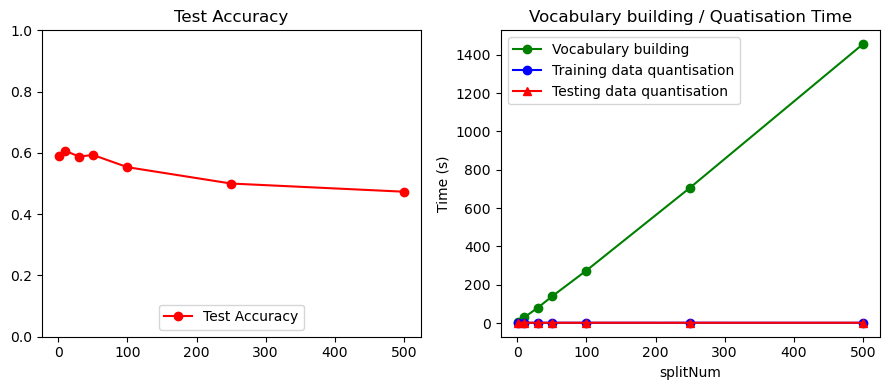

In [ ]:
# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Plot Accuracy for Splitnum
axs[0].plot(splitnum_list, test_accuracy, '-o', color='r', label='Test Accuracy')
#axs[0].plot(splitnum_list, best_result, '-o', color='g', label='Test Accuracy: best')
#axs[0].plot(splitnum_list, worst_result, '-o', color='y', label='Test Accuracy: worst')
axs[0].set_title('Test Accuracy')
plt.xlabel('splitNum')
plt.ylabel('Accuracy')
axs[0].legend(loc='lower center')
axs[0].axis(ymin=0.0,ymax=1.0)

# Plot Training and Testing Time for Splitnum
axs[1].plot(splitnum_list, vocab_time, '-o', color='g', label='Vocabulary building')
axs[1].plot(splitnum_list, trainQ_time, '-o', color='b', label='Training data quantisation')
axs[1].plot(splitnum_list, testQ_time, '-o', color='r', label='Testing data quantisation', marker='^')
axs[1].set_title('Vocabulary building / Quatisation Time')
axs[1].set_xlabel('splitNum')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q3-fig4', dpi=300)

In [202]:
# Load the .mat file
data = io.loadmat('.././RF_code/result/q2-4 (depth=10)/result_two-pixel.mat')
results = data['results']
# Extract required data
Ktest_accuracy = data['results']['num_depth_testaccuracy'][0, 0].flatten()[0].flatten()[0]
Ktrain_accuracy = data['results']['num_depth_trainaccuracy'][0, 0].flatten()[0].flatten()[0]
Ktrain_time = data['results']['num_depth_train_time'][0, 0].flatten()[0].flatten()[0]
Ktest_time = data['results']['num_depth_test_time'][0, 0].flatten()[0].flatten()[0]

# Load the .mat file
data = io.loadmat('.././RF_code/result/q3-3(1)/result_two_pixel.mat')
results = data['results']
# Extract required data
RFtwo_test_accuracy = data['results']['num_depth_testaccuracy'][0, 0].flatten()[0]
RFtwo_train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0].flatten()[0]
RFtwo_vocab_time = data['results']['vocab_time'][0, 0].flatten()[0]
RFtwo_trainQ_time = data['results']['train_quantization_time'][0, 0].flatten()[0]
RFtwo_testQ_time = data['results']['test_quantization_time'][0, 0].flatten()[0]
RFtwo_vocab_size = data['results']['vocab_size'][0, 0].flatten()[0]

# Load the .mat file
data = io.loadmat('.././RF_code/result/q3-1(2)/result_4_6.mat')
# Extract required data
RFax_test_accuracy = data['results']['num_depth_testaccuracy'][0, 0][2,4]
RFax_train_accuracy = data['results']['num_depth_trainaccuracy'][0, 0][2,4]
RFax_vocab_time = data['results']['vocab_time'][0, 0][2,4]
RFax_trainQ_time = data['results']['train_quantization_time'][0, 0][2,4]
RFax_testQ_time = data['results']['test_quantization_time'][0, 0][2,4]
RFax_vocab_size = data['results']['vocab_size'][0, 0][2,4]
#print(RFaxvocab_size)

# vocab size는 셋다 256으로 동일
weaklearner_list = ['K-means', 'RF axis-aligned', 'RF two-pixel']

[0.9959999999999999, 0.9786666666666667, 0.9879999999999999]
[0.6853333333333333, 0.6066666666666667, 0.6333333333333334]
[3.82577458, 27.471269, 29.981782199999998]
[0.17102156000000002, 1.2205499200000003, 1.5400863]


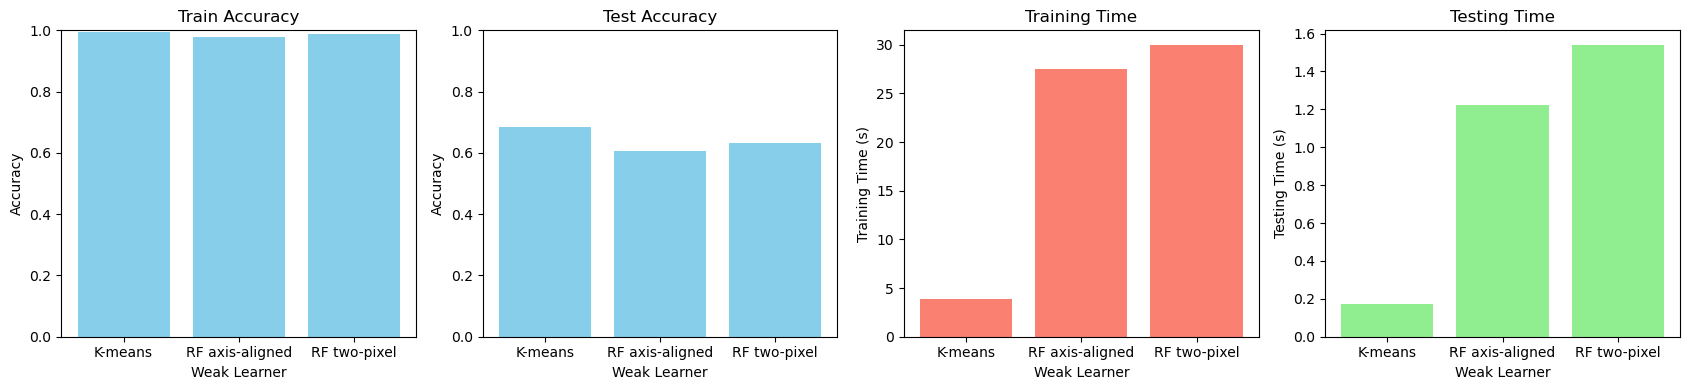

In [ ]:
# Set up the bar plots
fig, axs = plt.subplots(1, 4, figsize=(17, 4))
RFax_vocab_time = 27.471269
train_accuracy = [Ktrain_accuracy, RFax_train_accuracy, RFtwo_train_accuracy]
test_accuracy = [Ktest_accuracy, RFax_test_accuracy, RFtwo_test_accuracy]
train_time = [Ktrain_time, RFax_vocab_time, RFtwo_vocab_time]
test_time = [Ktest_time, RFax_testQ_time, RFtwo_testQ_time]

print(train_accuracy)
print(test_accuracy)
print(train_time)
print(test_time)

# Accuracy plot
axs[0].bar(weaklearner_list, train_accuracy, color='skyblue')
axs[0].set_title('Train Accuracy')
axs[0].set_xlabel('Weak Learner')
axs[0].set_ylabel('Accuracy')
axs[0].axis(ymin=0.0,ymax=1.0)

# Accuracy plot
axs[1].bar(weaklearner_list, test_accuracy, color='skyblue')
axs[1].set_title('Test Accuracy')
axs[1].set_xlabel('Weak Learner')
axs[1].set_ylabel('Accuracy')
axs[1].axis(ymin=0.0,ymax=1.0)

# Training time plot
axs[2].bar(weaklearner_list, train_time, color='salmon')
axs[2].set_title('Training Time')
axs[2].set_xlabel('Weak Learner')
axs[2].set_ylabel('Training Time (s)')

# Testing time plot
axs[3].bar(weaklearner_list, test_time, color='lightgreen')
axs[3].set_title('Testing Time')
axs[3].set_xlabel('Weak Learner')
axs[3].set_ylabel('Testing Time (s)')

# Adjust layout and save the figure
plt.tight_layout()

#plt.savefig('.././report/image/q3-fig4', dpi=300) 